In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = 'Folkhalsomyndigheten_Covid19.xlsx'

In [122]:
xl = pd.ExcelFile('data/'+file_name)
#xl.sheet_names
cases = xl.parse('Antal per dag region')

In [123]:
cases.tail()

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
80,2020-04-24,770,7,29,1,19,8,11,24,1,...,224,53,55,4,12,16,37,147,41,33
81,2020-04-25,474,0,45,3,23,1,13,19,1,...,139,8,12,5,6,5,0,94,37,30
82,2020-04-26,299,1,5,3,6,2,1,5,2,...,111,8,8,2,11,12,24,46,17,6
83,2020-04-27,543,0,8,4,11,13,6,23,7,...,196,10,35,8,4,11,24,101,18,13
84,2020-04-28,231,0,0,0,3,25,5,4,2,...,88,0,0,2,0,1,13,22,39,27


In [124]:
cases = cases[(cases['Statistikdatum'] > '2020-03-13')]

In [125]:
cases['Statistikdatum'] = cases['Statistikdatum'].dt.date

In [126]:
cases = cases.set_index('Statistikdatum')

In [127]:
del cases['Totalt_antal_fall']

In [128]:
cases.head()

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
Statistikdatum,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,0,0,1,0,3,0,2,1,0,...,18,1,4,1,3,0,0,5,0,7
2020-03-15,1,0,0,0,2,7,4,0,1,0,...,17,4,0,1,1,0,0,18,0,9
2020-03-16,0,0,0,2,1,1,2,0,0,0,...,34,12,2,2,2,1,7,6,0,8
2020-03-17,1,3,1,4,3,0,1,0,1,1,...,35,5,5,1,3,1,6,13,16,13
2020-03-18,1,2,1,2,2,4,2,1,1,0,...,58,0,17,1,3,1,0,10,3,28


In [129]:
cases = cases.fillna(0).astype('int32')

In [130]:
del cases['Stockholm']

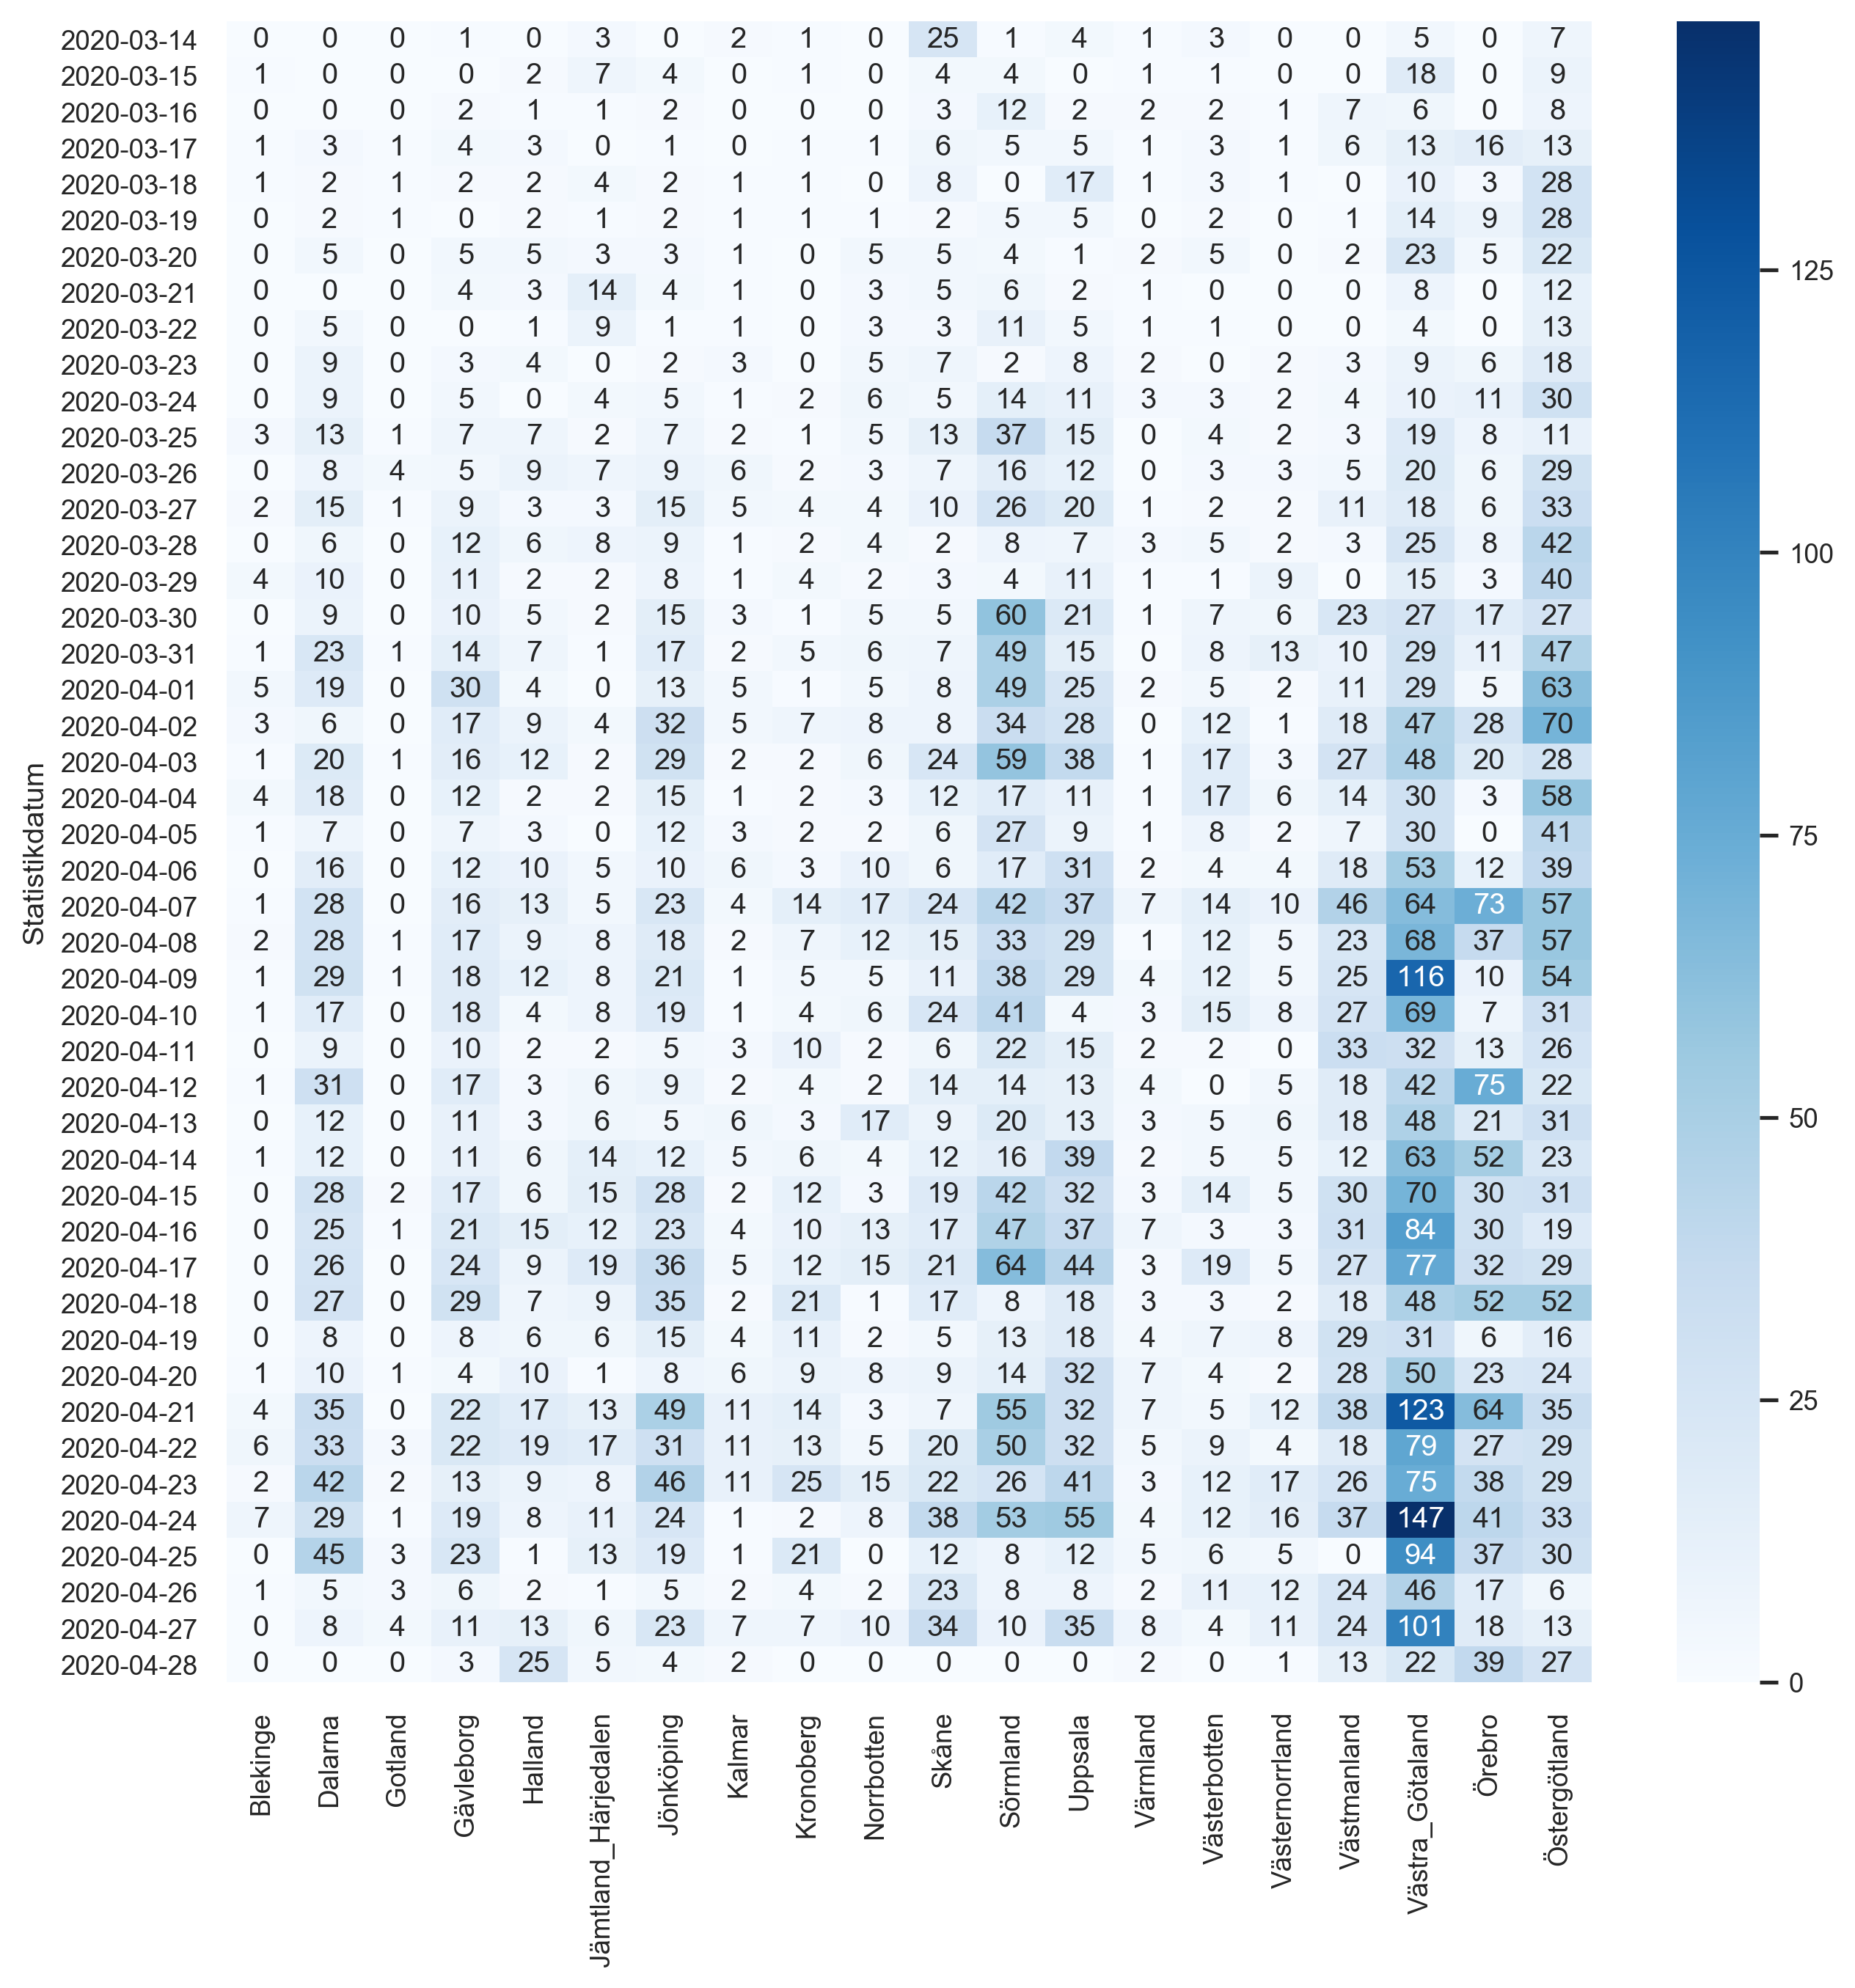

In [131]:
sns.set()
sns.set_context("notebook", font_scale=.8)

f, ax = plt.subplots(figsize=(10,10), dpi=300)

sns.heatmap(data=cases, ax=ax, annot=True, fmt='d', cmap='Blues')

plt.savefig('graphs/cases_heatmap.png', bbox_inches='tight')

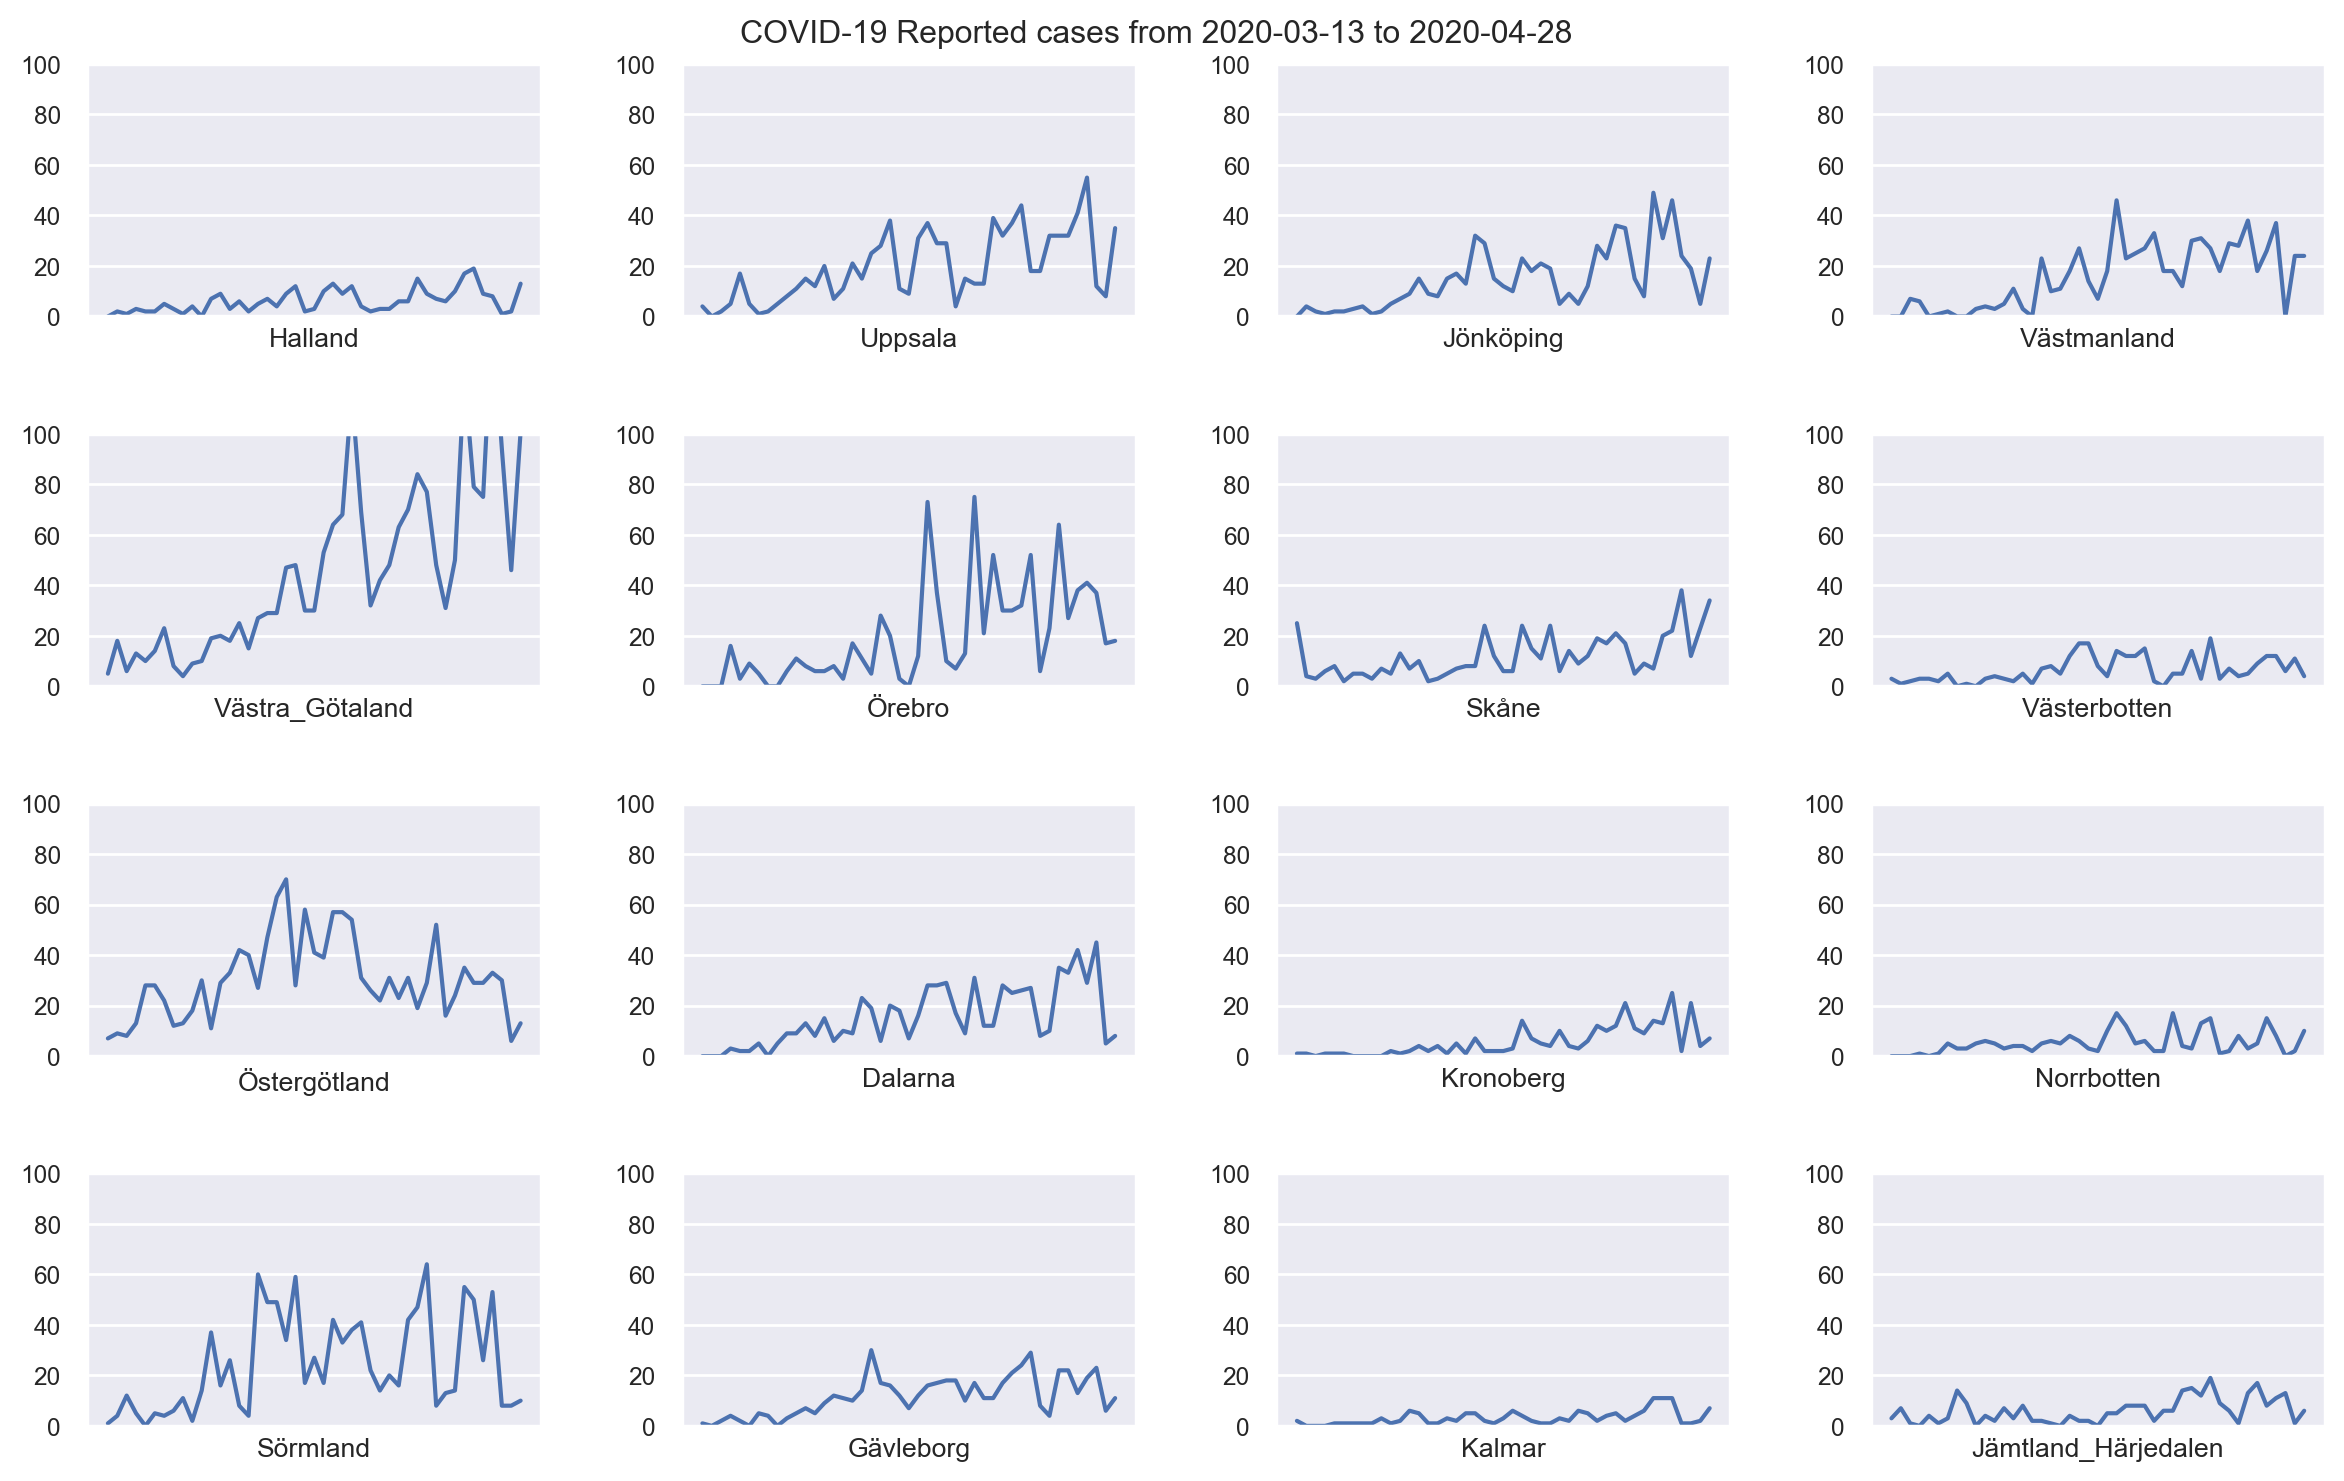

In [133]:
f2, ax2 = plt.subplots(nrows=4, ncols=4, figsize=(12,8), dpi=200)

regions = [
    'Halland',
    'Västra_Götaland',
    'Östergötland',
    'Sörmland',
    
    'Uppsala',
    'Örebro',
    'Dalarna',
    'Gävleborg',
    
    'Jönköping',
    'Skåne',
    'Kronoberg',
    'Kalmar',
    
    'Västmanland',
    'Västerbotten',
    'Norrbotten',
    'Jämtland_Härjedalen'
]

g = [None] * len(regions)

i, j = (0,0)
for r in regions:
    g[i] = sns.lineplot(data=cases[:-1], x=cases.index[:-1], y=r, ax=ax2[i][j])
    ax2[i][j].set_xlabel(r)
    i = i+1
    if i==4:
        j = j+1
        i = 0

f2.suptitle('COVID-19 Reported cases from 2020-03-13 to 2020-04-28')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
tmp = plt.setp(ax2, xticks=[], ylabel=None, ylim=(0,100))
#tmp = plt.setp(ax2, xticks=[], ylabel=None)

plt.savefig('reported_cases_graphs.png', bbox_inches='tight')